# Demonstration of classification with persistence images
by Nathaniel Saul

We will attempt to use persistence images to classify the input data. For this purpose, we will simulate data with different homology.



In [70]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [100]:
from itertools import product

import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from scipy.stats import multivariate_normal as mvn
import matplotlib.pyplot as plt

from ripser import Rips
from persimmon import PersImage

## Construct the data

Generate N datasets that are just noise and N that are noise with a circle. 

In [ ]:
N = 200
N_per_class = int(N / 2)
N_in_class = 400

def noise(N, scale):
    return scale * np.random.random((N, 2))

def circle(N, scale, offset):
    return offset + scale * datasets.make_circles(n_samples=N, factor=0.4, noise=0.05)[0]
    
just_noise = [noise(N_in_class, 150) for _ in range(N_per_class)]

half = int(N_in_class / 2)
with_circle = [np.concatenate((circle(half, 50, 70), noise(half, 150)))
               for _ in range(N_per_class)]

datas = []
datas.extend(just_noise)
datas.extend(with_circle)

# Define labels
labels = np.zeros(N)
labels[N_per_class:] = 1

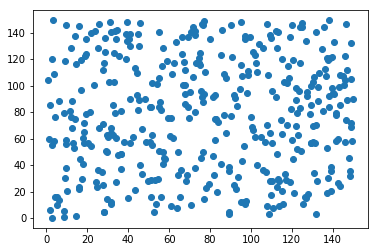

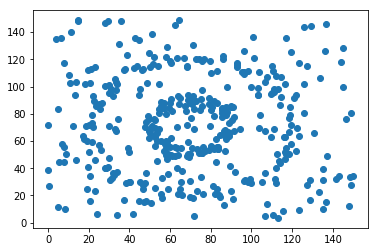

In [133]:
# Visualize the data
xs, ys = just_noise[0][:,0], just_noise[0][:,1]
plt.scatter(xs, ys)
plt.show()
xs_, ys_ = with_circle[0][:,0], with_circle[0][:,1]
plt.scatter(xs_, ys_)

## Compute homology of each dataset

Generate the persistence diagram of $H_1$ for each of the datasets generated above.

In [ ]:
rips = Rips()
diagrams = [rips.fit_transform(data) for data in datas]
diagrams_h1 = [rips.fit_transform(data)[1] for data in datas]

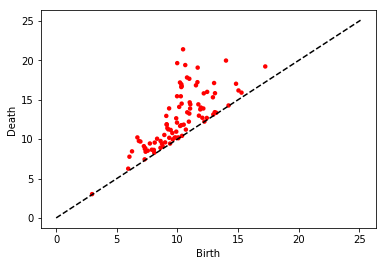

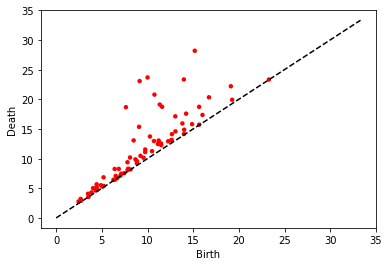

In [134]:
rips.plot(diagrams_h1[0])
rips.plot(diagrams_h1[-1])

# Compute persistence images

Convert each persistence diagram into a persistence image. Flatten each image into a vector format

In [140]:
pim = PersImage(pixels=20*20, spread=1)
imgs = pim.transform(diagrams_h1)

In [142]:
imgs_array = np.array([img.flatten() for img in imgs])

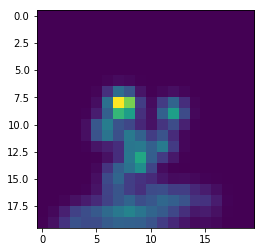

In [164]:
plt.imshow(imgs[0])
plt.imshow(imgs[-1])

# Classify the datasets from the persistence images

In [150]:
X_train, X_test, y_train, y_test = train_test_split(imgs_array, labels, test_size=0.40, random_state=42)

In [151]:
# LASSO logistic -> L1 penatly
lr = LogisticRegression(penalty='l1')
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [153]:
# Report the prediction score
lr.score(X_test, y_test)

0.925

# Inverse analysis on LASSO 

In [167]:
inverse_image = np.copy(lr.coef_).reshape((20,20))

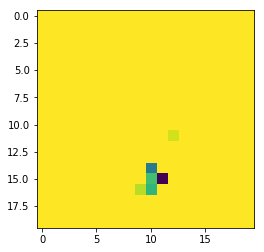

In [168]:
plt.imshow(inverse_image)